## Project 4: Subsidizing and Fortifying Elastic vs. Inelastic Goods


Previously, we used data to estimate systems of food demand using different datasets. Here, the output from the previous project was as set of `cfe.Result` objects; these bundle together both data and the results from the demand system estimation. We may also use this for our predictions.

This time, we propose a policy that will fortify specific goods. Fortified foods are those that have nutrients added to them that don’t naturally occur in the food. In many parts of the world, foritification of food is a systematic approach to correct identified nutrient deficiencies in the population, including the population of Uganda. Fortifying foods can help prevent specific deficiency disease syndromes. Some major micronutrient deficiencies of interest in Uganda are iodine-deficiency disorders, vitamin A deficiency, and iron-deficiency anemia. In fact, by the beginning of the 1990s, very little was known about the prevalence of these major deficiencies in Uganda.

### Installing required packages

Here, we shall explore some of the uses of the `cfe.Result` class, using an instance created using data from the Uganda data.

Below, we will install the latest version of the `cfe` package and its dependencies.

In [1]:
!pip install CFEDemands --upgrade --pre
!pip install xarray --upgrade
!pip install h5netcdf
!pip install dvc

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.8/site-packages (0.2.9)
Requirement already up-to-date: xarray in /opt/conda/lib/python3.8/site-packages (0.17.0)


In [2]:
import cfe
# to look at the documentation 
#cfe.Result?

In [3]:
# loading the uganda data set
r = cfe.result.from_dataset('Uganda_small.ds')

### Estimating Parameters 

Our focus earlier was on estimation of parameters, but the result `r` already has encoded in it the results of that estimation.

The $\alpha$ parameters are:

In [4]:
r.get_alpha(as_df=True).dropna()

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

The $\beta$ elasticity parameters that tell us how much demand changes as the MUE falls are:

In [5]:
r.get_beta(as_df=True).dropna()

i
beans dry                             0.255622
beans fresh                           0.381523
beef                                  0.384351
bread                                 0.568417
cabbages                              0.357247
cassava dry/flour                     0.124855
cassava fresh                         0.313435
chicken                               0.322282
coffee                                0.632619
cooking oil                           0.483203
dodo                                  0.452957
dry/smoked fish                       0.351626
eggs                                  0.420556
expenditure in restaurants on food    0.460684
fresh fish                            0.412433
fresh milk                            0.567437
goat meat                             0.360544
ground nuts pounded                   0.367467
irish potatoes                        0.388275
maize cobs                            0.356432
maize flour                           0.285216
mangoes    

The estimated parameters related to household characteristics $\delta$ are:

In [6]:
r.delta.to_dataframe().unstack('k').dropna()

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                          -0.020105  0.091101  0.069991  0.131634   
beans fresh                         0.003502  0.138232  0.049423  0.043303   
beef                                0.012622  0.025357  0.076339  0.081080   
bread                              -0.010931 -0.010405  0.039982  0.015581   
cabbages                            0.014337 -0.007694  0.035684  0.098675   
cassava dry/flour                   0.240597  0.163090  0.237445  0.090692   
cassava fresh                      -0.003535  0.006866  0.158522  0.094510   
chicken                             0.005440 -0.043764  0.015580  0.035094   
coffee                              0.022706 -0.057133  0.028877  0.008619   
cooking oil                        -0.029436 -0.006941  0.021453  0.052854   
dodo                               -0.064294  0.010363  0.145474  0.102694   
dry/smoked fish                    -0.037726  0.043358  0.094554  0.125807   
eggs                               -0.071013  0.041225  0.006218  0.000555   
expenditure in restaurants on food -0.094559  0.037472  0.151278  0.025689   
fresh fish                          0.020568  0.080817  0.028284  0.073189   
fresh milk                         -0.001583 -0.002583 -0.014292 -0.023467   
goat meat                          -0.052198  0.101357  0.009729  0.055356   
ground nuts pounded                 0.033751  0.022292  0.009320  0.044031   
irish potatoes                      0.086792  0.069802  0.115015  0.128570   
maize cobs                         -0.064494 -0.044831  0.043807  0.182292   
maize flour                         0.009996  0.112082  0.142091  0.075552   
mangoes                            -0.012302  0.032207  0.053649 -0.052200   
margarine,butter                   -0.015707  0.022894 -0.081790 -0.020390   
matooke_1                          -0.017372  0.179616  0.051870  0.053682   
millet                              0.096938  0.067989  0.001464  0.142472   
onions                             -0.051036 -0.027855  0.030258  0.048141   
oranges                            -0.050278  0.097141  0.035387  0.028289   
other vegetables                    0.012330 -0.046587  0.078986  0.052800   
passion fruits                      0.007164 -0.067459  0.028914 -0.094513   
rice                                0.041959  0.089870  0.105172  0.099908   
salt                                0.072773  0.065634  0.082439  0.087910   
soda                               -0.011965 -0.063974  0.055411 -0.049988   
sugar                               0.012851  0.059009  0.045291  0.091241   
sweet bananas                       0.011865  0.005062  0.000327  0.025421   
sweet potatoes fresh                0.110313  0.127481  0.137242  0.100394   
tea                                -0.012445  0.016257  0.036033  0.041242   
tomatoes                           -0.040840 -0.022914  0.018166  0.050890   

                                                                            \
k                                    M 19-30   M 31-50     M 51+     F 0-3   
i                                                                            
beans dry                           0.092998  0.126748  0.192872  0.035235   
beans fresh                         0.140382  0.256491  0.353082  0.098333   
beef                                0.114490  0.197677  0.197012  0.004936   
bread                               0.133572  0.290906  0.142049  0.021215   
cabbages                            0.061728  0.060672  0.079951  0.038930   
cassava dry/flour                   0.106282  0.175328  0.190029  0.068200   
cassava fresh                       0.057267  0.043634  0.019687  0.003492   
chicken                             0.125162  0.132872  0.148593 -0.003726   
coffee                              0.098526  0.060754  0.42

The triple of paramters $(\alpha,\beta,\delta)$ will describe the demand system and the corresponding utility function (over the goods observed in our data).

Notice that the dataset does not include all types of goods, but the goods that we have data for. A future analysis would include more data on the goods consumed by the Ugandan population.

### Examining the Marshallian and Hicksian Demands

We have estimated the parameters of a Frischian demand system (demands that depend on prices and the households marginal utility of expenditures). Furthermore, we use the `cfe.Result.demands` method to compute the Marshallian (depending on the prices and budget) or Hicksian (depending on the prices and the level of utility) demands for this same population.  



In [7]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
medianx = x.where(x>0).sel(t=t,m=m).median('j').values # Budget (median household)

/opt/conda/lib/python3.8/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Below, we compute expenditures on different items using the the estimated parameters from the object `r.demands`.

In [8]:
xbar=r.demands(medianx) # Expenditures given median budget
xbar

i
beans dry                                48.335122
beans fresh                             270.018359
beef                                    487.609124
bread                                  5158.943978
cabbages                                177.400428
cassava dry/flour                         6.933017
cassava fresh                           112.526915
chicken                                 219.480177
coffee                                 3957.333812
cooking oil                            1209.084295
dodo                                    581.181751
dry/smoked fish                         205.035773
eggs                                    493.517356
expenditure in restaurants on food     1895.060801
fresh fish                              618.635817
fresh milk                             6657.255660
goat meat                               309.839817
ground nuts pounded                     227.663008
irish potatoes                          364.788233
maize cobs                   

In [9]:
USE_GOOD = 'bread'
    
# Reference prices for kgs at time t in market m
# obtain get into physical units (say kilograms) 
# by dividing coconut expenditures by the price per kg in a given time and place:
ref_price = r.prices.sel(t=t,m=m, u = "Kilogram (kg)")

r.demands(medianx)[USE_GOOD]/ref_price.loc[USE_GOOD].values

2.579471988763924

In [10]:
# Let's observe what happens when the reference prices double.
r.demands(medianx, 2*ref_price)

i
beans dry              1.289110
beans fresh            1.196453
beef                   1.394138
bread                  0.954935
cassava dry/flour      1.273060
coffee                 0.347709
dry/smoked fish        1.263730
goat meat              1.184031
ground nuts pounded    0.990677
irish potatoes         1.698988
maize flour            1.532292
mangoes                0.942596
margarine,butter       1.187460
millet                 1.410127
onions                 0.561112
other vegetables       0.808866
rice                   1.432651
salt                   0.916398
sugar                  1.230998
tea                    0.741985
tomatoes               0.734609
Name: quantities, dtype: float64

Now we trace out demands for a household with median budget but varying prices of bread holding other good prices fixed (ceteris paribus):

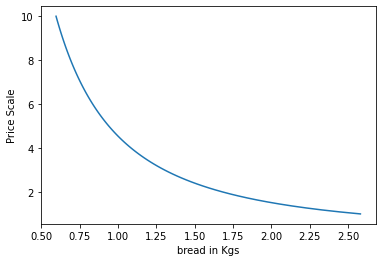

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scales of prices:
P = np.linspace(1,10,100).tolist()

plt.plot([r.demands(medianx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale');

One may also trace out demands for different budgets:

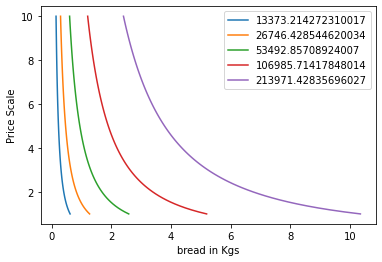

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = [medianx*s for s in [.25,.5,1.,2,4]]
for myx in X:
    # trace out demands for different budgets
    plt.plot([r.demands(myx,p={USE_GOOD:scale})[USE_GOOD]/ref_price.loc[USE_GOOD].values for scale in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')
plt.legend(X);

### Estimating the nutrient demands

In [13]:
import sys
sys.path.append('./Project3')

!pip install oauth2client
import oauth2client

from matplotlib import pyplot as plt

InputFiles = {'Expenditures':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','Expenditures'),
              'Consumption':('1RT5AfbZbWx-CmNaOHLp7aD9qEjgjiBv8lZmPexuKEWg','Consumption'),
              'HH Characteristics':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','HH Characteristics'),
              'FCT':('1a-pug3dN9TmNSILmIKx-g-h8ddqtQlD5UrD5Rd84BpY','Sheet2'),
              'FCT_Codes': ('1a-pug3dN9TmNSILmIKx-g-h8ddqtQlD5UrD5Rd84BpY', 'Sheet1')}


# nutrient
from eep153_tools import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,json_creds,sheet=None):

    df = read_sheets(key,json_creds,sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    json_creds='../students.json',
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    json_creds='../students.json',
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get purchased consumption quantities
q = get_clean_sheet(InputFiles['Consumption'][0],
                    json_creds='../students.json',
                    sheet=InputFiles['Consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)
q = q.loc[~q.index.duplicated(), :]

fct = get_clean_sheet(InputFiles['FCT'][0],
                    json_creds='../students.json',
                    sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
#fct = fct.loc[fct.Code.str.len()==6]
#fct = fct.set_index('Code')
#fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################

fct.index.name = 'i'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

fct2 = get_clean_sheet(InputFiles["FCT_Codes"][0],
                      json_creds = '../students.json',
                      sheet = InputFiles["FCT_Codes"][1])

fct2 = fct2[["Nutrition", "CODE"]]
fct2 = fct2[fct2["CODE"] != 'NA'].reset_index(drop = True)
fct2 = fct2[fct2["CODE"] != 'N/A'].reset_index(drop = True)
fct2 = fct2.rename(columns = {"Nutrition": "Uganda Food"})
fct2["CODE"] = pd.to_numeric(fct2["CODE"], errors='coerce')
fct2.head()

,Uganda Food,CODE
0,Matooke(others),5001
1,avocado,29110
2,beans dry,806001
3,beans fresh,806001
4,beef,811022


In [14]:
import cfe

result = cfe.Result(y=np.log(x),z=z)

# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures() 
betas = result.get_beta(as_df=True).sort_values(ascending=False) # Check sanity...

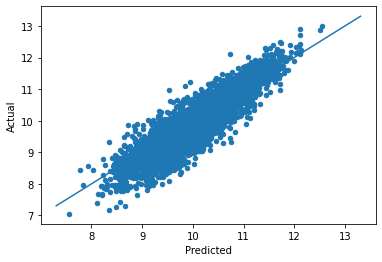

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

zeros_r = cfe.Result(y=(0.+(result.y>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [16]:
xhatdf = xhat.to_dataframe('').unstack('i')
xhatdf.columns = xhatdf.columns.droplevel(0)

phat = (xhatdf/q).squeeze()

phat = phat.xs('Kilogram (kg)',level='u').groupby(['t','m']).median().dropna(how='all')


In [17]:
qhat = xhatdf.div(phat,axis=1)
qhat

i                         Matooke(cluster)  Matooke(others)  avocado  \
t    m j                                                               
2005 1 1013000201                      NaN              NaN      NaN   
       1013000202                      NaN              NaN      NaN   
       1013000204                      NaN              NaN      NaN   
       1013000206                      NaN              NaN      NaN   
       1013000209                      NaN              NaN      NaN   
...                                    ...              ...      ...   
2011 1 3010730012030203                NaN              NaN      NaN   
       3010730016100203                NaN              NaN      NaN   
       3010830020020503                NaN              NaN      NaN   
       3030230010040204                NaN              NaN      NaN   
       30211230006050302               NaN              NaN      NaN   

i                         beans dry  beans fresh      beef  beer     bread  \
t    m j                                                                     
2005 1 1013000201          1.574873     1.309556  1.425646   NaN  1.410600   
       1013000202               NaN          NaN       NaN   NaN       NaN   
       1013000204               NaN          NaN       NaN   NaN       NaN   
       1013000206               NaN          NaN       NaN   NaN       NaN   
       1013000209          0.915207     0.723755  0.897303   NaN  0.813331   
...                             ...          ...       ...   ...       ...   
2011 1 3010730012030203    1.438497     1.619921  1.225496   NaN  1.134225   
       3010730016100203    0.709830     0.638191  0.500297   NaN  0.393198   
       3010830020020503    1.076024     1.170627  0.731588   NaN  0.635401   
       3030230010040204         NaN          NaN       NaN   NaN       NaN   
       30211230006050302        NaN          NaN       NaN   NaN       NaN   

i                         cabbages  carrots  ...  simsim  soda  sorghum  \
t    m j                                     ...                          
2005 1 1013000201              NaN      NaN  ...     NaN   NaN      NaN   
       1013000202              NaN      NaN  ...     NaN   NaN      NaN   
       1013000204              NaN      NaN  ...     NaN   NaN      NaN   
       1013000206              NaN      NaN  ...     NaN   NaN      NaN   
       1013000209              NaN      NaN  ...     NaN   NaN      NaN   
...                            ...      ...  ...     ...   ...      ...   
2011 1 3010730012030203        NaN      NaN  ...     NaN   NaN      NaN   
       3010730016100203        NaN      NaN  ...     NaN   NaN      NaN   
       3010830020020503        NaN      NaN  ...     NaN   NaN      NaN   
       3030230010040204        NaN      NaN  ...     NaN   NaN      NaN   
       30211230006050302       NaN      NaN  ...     NaN   NaN      NaN   

i                            sugar  sweet bananas  sweet potatoes dry  \
t    m j                                                                
2005 1 1013000201         1.418187            NaN                 NaN   
       1013000202              NaN            NaN                 NaN   
       1013000204              NaN            NaN                 NaN   
       1013000206              NaN            NaN                 NaN   
       1013000209         0.804322            NaN                 NaN   
...                            ...            ...                 ...   
2011 1 3010730012030203   1.243724       0.621851                 NaN   
       3010730016100203   0.438885       0.187282                 NaN   
       3010830020020503   0.711431       0.316550                 NaN   
       3030230010040204        NaN            NaN                 NaN   
       30211230006050302       NaN            NaN                 NaN   

i                         sweet potatoes fresh       tea  tomatoes  watermelon  
t    m j                                 

In [18]:
print(pd.Series(xhat.coords['i']).to_markdown())

|    | 0                                  |
|---:|:-----------------------------------|
|  0 | beans dry                          |
|  1 | beans fresh                        |
|  2 | beef                               |
|  3 | bread                              |
|  4 | cabbages                           |
|  5 | cassava dry/flour                  |
|  6 | cassava fresh                      |
|  7 | chicken                            |
|  8 | coffee                             |
|  9 | cooking oil                        |
| 10 | dodo                               |
| 11 | dry/smoked fish                    |
| 12 | eggs                               |
| 13 | expenditure in restaurants on food |
| 14 | fresh fish                         |
| 15 | fresh milk                         |
| 16 | goat meat                          |
| 17 | ground nuts pounded                |
| 18 | irish potatoes                     |
| 19 | maize cobs                         |
| 20 | maize flour              

In [19]:
i_to_fct = fct2.set_index("Uganda Food").squeeze().to_dict()

myq = qhat.rename(columns=i_to_fct)
keep_columns = myq.columns.intersection(i_to_fct.values())
myq = myq[keep_columns]
myq = myq.groupby("i", axis = 1).sum()

# Drop goods with no obs, households with no goods
myq = myq.dropna(how='all',axis=1).dropna(how='all')

# Create version of fct with just foods in myq
#fct.set_index("food_code")
myfct=fct[fct['food_code'].isin(myq.columns)].drop(columns = {'food_description', 'food_state', 'food_state_code',
       'fct_source', 'fct_source_code', 'fct_source_descr',
       'water_source_descr', 'retention_source', 'retention_source_code',
       'retention_source_descr', 'food_group', 'food_group_code'}) # Drop columns which aren't nutrients

myfct.head()

,food_code,water_g,dry_matter_g,energy_kcal,protein_g,lipid_total_g,carbohydrate_g,fiber_g,calcium_mg,iron_mg,...,folic_acid_mcg,folate_food_mcg,folate_dfe_mcg,vit_b12_mcg,vit_a_iu,vit_a_rae_mcg,retinol_mcg,alpha_carot_mcg,beta_carot_mcg,beta_crypt_mcg
i,,,,,,,,,,,,,,,,,,,,,
5,1006,45.2,54.8,224,5.7,2.9,45.5,4.0,4,1.7,...,0,10,10,0.0,125,6,0,37,57,0
14,1015,2.5,97.5,397,10.2,5.1,80.9,8.0,8,2.8,...,0,14,14,0.0,210,11,0,62,95,0
15,1021,57.9,42.1,172,4.4,2.2,34.9,4.0,3,1.3,...,0,12,12,0.0,0,0,0,0,0,0
23,1041,11.3,88.7,369,7.3,1.8,79.2,4.0,3,1.1,...,0,30,30,0.0,3,0,0,0,1,1
40,1305,36.4,63.6,266,7.6,3.3,50.6,2.0,151,3.7,...,86,25,171,0.0,0,0,0,0,0,0


In [20]:
#make the food codes the indexes so its easier to join
fct2 = fct2.set_index("CODE")
myfct = myfct.set_index("food_code")


In [21]:
myfct = myfct.replace(np.nan, 0)

In [22]:
myfct.index = myfct.index.astype(str)
myq.columns = myq.columns.astype(str)
## drop this column (9176 = mangoes) since there lacks data on mangos in the fct
myq = myq.drop(columns = {"9176"})

The result below gives the amount of nutrients from the past week for the entire household.

In [23]:
nutrients = myq@(myfct)
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household.

water_g              366.359702
dry_matter_g         294.931052
energy_kcal         1688.377964
protein_g             56.401598
lipid_total_g         16.999487
carbohydrate_g       329.582867
fiber_g               22.630547
calcium_mg           237.323958
iron_mg               10.775828
zinc_mg                8.145577
vit_c_mg             130.281543
thiamin_mg             1.075943
riboflavin_mg          0.827995
niacin_mg             11.436798
vit_b6_mg              1.911100
folate_total_mcg     245.576720
folic_acid_mcg        18.292687
folate_food_mcg      227.284033
folate_dfe_mcg       258.339059
vit_b12_mcg            2.128225
vit_a_iu             776.902395
vit_a_rae_mcg         56.084020
retinol_mcg           20.901417
alpha_carot_mcg       33.855358
beta_carot_mcg       402.956941
beta_crypt_mcg         8.563740
dtype: float64

## Nutritional Adequacy

To examine the nutritional adequacy of food demands, we use the code from the `proof_of_concepts.ipynb`

In [24]:
COUNTRY = 'Uganda'
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/',
       'Tanzania':'https://docs.google.com/spreadsheets/d/1Tknc2F8K6SaA7j0R7J_NE8yJBTsCPPw77_Bfc04MY40/',
       'ICRISAT':'https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo'}
DAYS_PER_PERIOD = {'Uganda':7,'Tanzania':7,'ICRISAT':365.25} # Number of days of expenditure recall

my_creds = '../students.json'

##
x = read_sheets(URL[COUNTRY],json_creds=my_creds,sheet='Expenditures').set_index(['j','t','m'])
x.columns.name = 'i'
x = x.replace(0,np.nan)
y = np.log(x)

z = read_sheets(URL[COUNTRY],json_creds=my_creds,sheet='HH Characteristics').set_index(['j','t','m'])
z.columns.name = 'k'

p = read_sheets(URL[COUNTRY],json_creds=my_creds,sheet='Prices').set_index(['t','m'])
p.columns.name = 'i'

r = cfe.Result(y=y,z=z,prices=p)

# r.to_dataset("my %s.ds" % COUNTRY)

r.get_alpha()
xhat = r.get_predicted_expenditures()
##


##
my_t = r.coords['t'].data.flatten()[0]
my_m = r.coords['m'].data.flatten()[0]
my_i = r.coords['i'].data.flatten()[0]

p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna()

def my_prices(p0,p=phat,i=my_i):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()
##

##
xbar = r.get_predicted_expenditures().sum('i')
median_x = xbar.where(xbar>0).sel(t=my_t,m=my_m).median('j') # Budget (median household)
##


##
ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/5,ref_price*5,50)
##

##
# Get FCT:
fct = read_sheets(URL[COUNTRY],
                  json_creds='../students.json',
                  sheet='FCT').set_index('i')
fct.columns.name='n'

def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

fct.head()

/opt/conda/lib/python3.8/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/opt/conda/lib/python3.8/site-packages/xarray/core/nputils.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,,,,,,,,,,,,,,,
Beans,1060,65,50,1040,270,191,16.0,2.86,0.49,0.87,0,0.0,0.73,14,7.0
Beef,2910,264,0,50,90,0,27.0,33.50,2.20,0.50,0,18.5,1.70,0,60.0
Beer,430,5,0,60,40,35,0.0,5.10,0.30,0.10,0,0.2,0.50,0,0.0
Bread,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0
Bun,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0


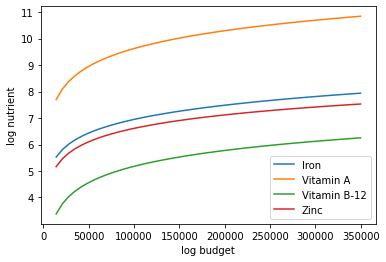

In [25]:
import numpy as np
import pandas as pd

### If you're getting lots of not useful warnings you want to ignore
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
####################################################################

X = np.linspace(median_x/5,median_x*5,50)

UseNutrients = ['Iron', 'Vitamin A', 'Vitamin B-12', 'Zinc']
# UseNutrients = fct.columns.tolist()

In [26]:
rdi = read_sheets(URL[COUNTRY],
                  json_creds='../students.json',
                  sheet='RDI').set_index('n').replace(np.nan,0)
rdi.columns.name = 'k'

rdi = rdi.replace('',0)
rdi.head()

k,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


In [27]:
# Find average household characteristics for reference period & place
zbar = r.z.sel(t=my_t,m=my_m,drop=True).mean('j').to_dataframe()

# This matrix product gives minimum nutrient requirements for average
# household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
hh_rdi

,z
n,
Energy,61649.775785
Protein,1366.551570
Fiber,863.096861
Folate,11449.775785
Calcium,37338.565022
Carbohydrate,4511.233184
Iron,379.840807
Magnesium,9815.201794
Niacin,436.834081


In [28]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

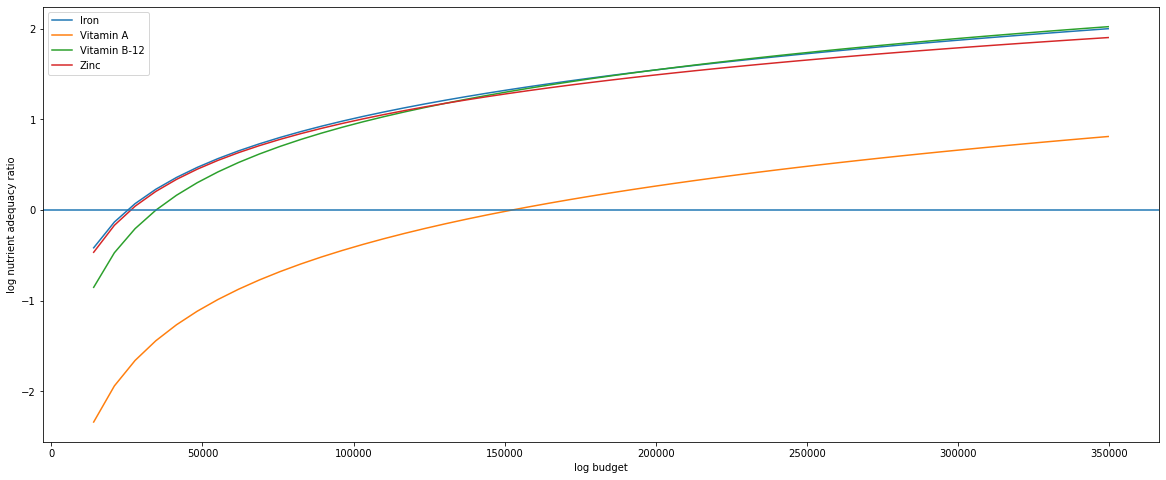

In [29]:
plt.figure(figsize= (20, 8))
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0);

# logged budget vs logged nutrient adequacy ratio

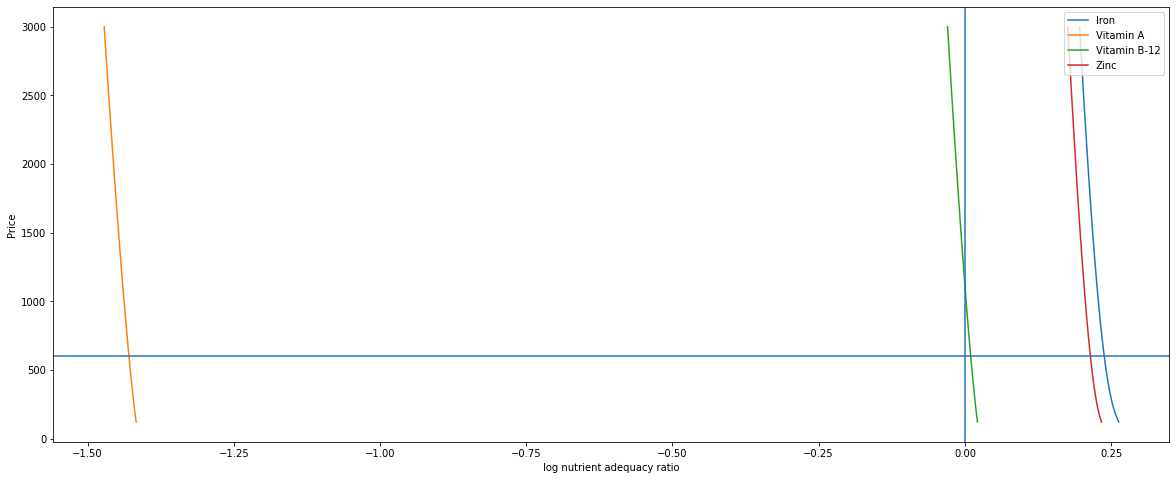

In [31]:
poorer_x = median_x/2

plt.figure(figsize= (20, 8))
plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,i=my_i)))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients, loc = 'upper right')
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i=my_i).values);